# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Gabriel Monteiro</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [50]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
df.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [53]:
df.loc[(df.Latitude>0),"Hemisfério"] = "Norte"
df.loc[(df.Latitude<0),"Hemisfério"] = "Sul"
q1 = pd.concat([df.Latitude,df['Hemisfério']], axis = 1).head(11)
q1

,Latitude,Hemisfério
0,19.246,Norte
1,1.863,Norte
2,-20.579,Sul
3,-59.076,Sul
4,11.938,Norte
5,-13.405,Sul
6,27.357,Norte
7,-13.309,Sul
8,-56.452,Sul
9,-24.563,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [7]:
df.Magnitude.describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

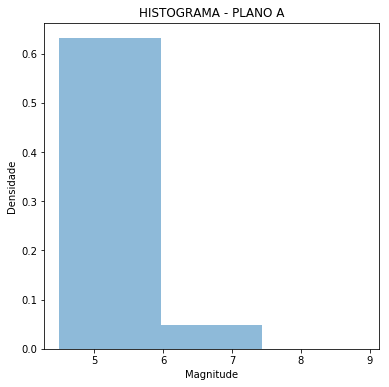

In [23]:
faixa= np.arange(4.5,10.1,1.47)
plot = df.Magnitude.plot.hist(bins=faixa,title='HISTOGRAMA - PLANO A',figsize=(6, 6), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Magnitude')
plt.show()

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [40]:
mu=df['Magnitude'].mean()
lamb=1/mu
sigma=1/lamb
n=500

scale=mu
loc=0

dados = expon.rvs(loc,scale,n)



Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

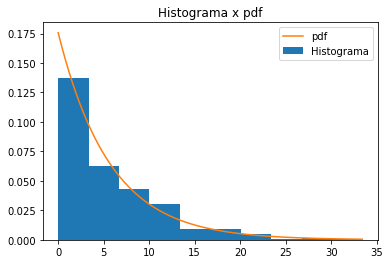

In [42]:
#Histograma vs pdf
plt.hist(dados, normed = True)
faixa = np.arange(dados.min(),dados.max(), 0.1)
plt.plot(faixa, expon.pdf(faixa, loc, scale))
plt.title('Histograma x pdf')
plt.legend(['pdf', 'Histograma'])

A idéia é que a área do histograma e da fdp seja 1.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [9]:
pd.crosstab(df['Hemisfério'],df.Type,margins=True,rownames=['Hemisfério'], colnames=['Types'], normalize=True)

Types,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,0.447140,0.000085,0.006279,0.000000,0.453505
Sul,0.545171,0.000085,0.001196,0.000043,0.546495
All,0.992311,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

Explique o seu raciocínio

A probabilidade de ocorrer o terremoto no hemisfério norte é de 44,71%, visto que na tabela esse valor se encontrar quando essas duas informações se cruzam.De 100% dos eventos , 44,71% é a ocorrência de terremotos no hemisfério Norte.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

P(ne|N) = P(ne ∩ N)/P(N)

In [10]:
(0.627910/45.350476)*100

1.3845720163995632

P(ne|N) = 1,38%

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

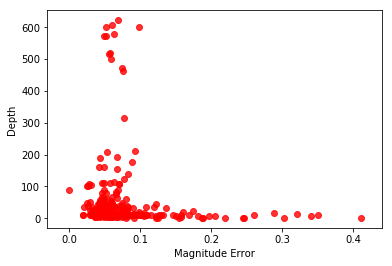

In [56]:
df_semnan=df.dropna(subset=['Magnitude Error', 'Depth'])

plt.scatter(df_semnan['Magnitude Error'],df_semnan.Depth, c='red', alpha=0.8)
plt.xlabel('Magnitude Error')
plt.ylabel('Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [57]:
print("Correlação entre Magnitude Error e Depth:",np.corrcoef(df_semnan['Magnitude Error'],df_semnan.Depth)[0,1])

Correlação entre Magnitude Error e Depth: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

O valor retornado demonstra uma correlação moderada entre as variáveis (0,5) e o sinal negativo traz a informação que enquanto uma cresce, a outra decresce.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [58]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [59]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x20e439f5cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x20e459cf588>,
 'fliers': [<matplotlib.lines.Line2D at 0x20e441a6f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x20e434c1e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x20e43957ba8>,
  <matplotlib.lines.Line2D at 0x20e4425ee48>]}

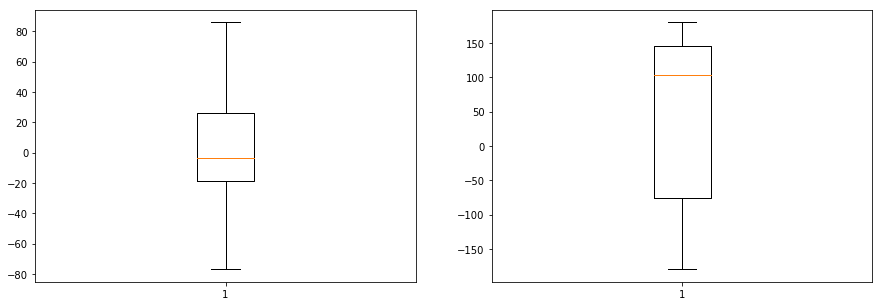

In [62]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.boxplot(df.Latitude)

plt.subplot(122)
plt.boxplot(df.Longitude)


Nos boxplots acima, é possível observar uma dispersão maior no de latitude, uma vez que sua caixa é maior.No mesmo, é de se notar uma assimetria a direita, em que a maior quantidade de valores são os menores. No box da latitude ocorre uma dispersão bem menor e uma assimetria leve para a esquerda.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [61]:
prob=pd.crosstab([df.Hemisfério,df['Magnitude Type']],df.Type,normalize=True)
prob

Type                       Earthquake  Explosion  Nuclear Explosion  \
Hemisfério Magnitude Type                                             
Norte      MB                0.066089   0.000085           0.005767   
           MD                0.000256   0.000000           0.000000   
           MH                0.000214   0.000000           0.000000   
           ML                0.002777   0.000000           0.000513   
           MS                0.032724   0.000000           0.000000   
           MW                0.157382   0.000000           0.000000   
           MWB               0.047505   0.000000           0.000000   
           MWC               0.102059   0.000000           0.000000   
           MWR               0.000513   0.000000           0.000000   
           MWW               0.037551   0.000000           0.000000   
Sul        MB                0.087449   0.000085           0.001196   
           MS                0.039944   0.000000           0.000000   
           MW                0.172505   0.000000           0.000000   
           MWB               0.057502   0.000000           0.000000   
           MWC               0.140080   0.000000           0.000000   
           MWR               0.000598   0.000000           0.000000   
           MWW               0.047163   0.000000           0.000000   

Type                       Rock Burst  
Hemisfério Magnitude Type              
Norte      MB                0.000000  
           MD                0.000000  
           MH                0.000000  
           ML                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000000  
           MWR               0.000000  
           MWW               0.000000  
Sul        MB                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000043  
           MWR               0.000000  
           MWW               0.000000

A partir da tabela cruzada acima, é possível notar que no hemisfério Norte, a chance de ocorrer abalos do tipo MB e Nuclear Explosion sao de 0,57% , enquanto no Sul essas chances se tratam de 0,11%, sendo assim mais provável que isso ocorra no Norte.